# Group 2: Week 4 _Activity

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('Telco-Customer-Churn.xlsx')

In [6]:
display(data.head)
display(data.dtypes)

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Comment: data import is successful.
____________________________________________________________

**1.Compare churn count with respect to gender.**

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


Text(0.5, 1.0, 'Plot of Churn count with respect to gender')

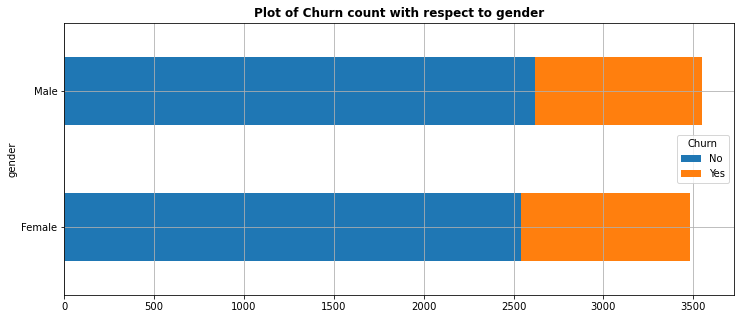

In [34]:
gender_churn = data.groupby(['gender','Churn']).size().unstack()
display(gender_churn)
gender_churn.plot(kind='barh', stacked=True, figsize=[12,5])
plt.grid(True)
plt.title('Plot of Churn count with respect to gender',fontweight='bold')

Comment: Female churn out count is more than men.
____________________________________________________________

**2. Findout how many female senior citizen there in the dataset**

,gender,SeniorCitizen
0,Female,568
1,Male,574


Female senior citizens count: 568


Text(0.5, 1.0, 'Plot of Male and Female Senior Citizens')

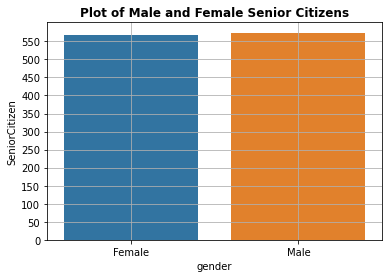

In [41]:
sen_citi = data[data['SeniorCitizen']==1].groupby(['gender'], as_index=False).agg({'SeniorCitizen':'count'})
display(sen_citi)
sns.barplot(x= 'gender',y = 'SeniorCitizen',data = sen_citi)
plt.yticks(np.arange(0,600,50))
plt.grid(True)
gender_f=data[(data['gender']=='Female') ]
print('Female senior citizens count:',gender_f['SeniorCitizen'].sum())
plt.title('Plot of Male and Female Senior Citizens',fontweight='bold')

____________________________________________________________

**3. Compare 'tenure' with 'Total Charges'**

Text(0, 0.5, 'Total Charges')

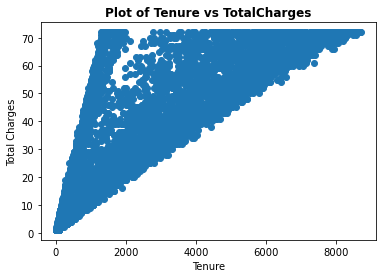

In [39]:
data.drop(data[data['TotalCharges']==' '].index, inplace = True)
data['TotalCharges']= data['TotalCharges'].astype('float')
plt.scatter(x = data['TotalCharges'],y =data['tenure'])
plt.title('Plot of Tenure vs TotalCharges',fontweight='bold')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

Comment: Tenure increases w.r.t TotalCharges
____________________________________________________________

**4) Find out which contract preffered by the senior citizen.**

,Contract,SeniorCitizen
0,Month-to-month,807
1,One year,190
2,Two year,145


Text(0.5, 1.0, 'Plot of Prefered Contract Type')

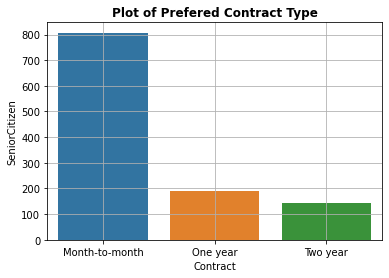

In [37]:
sen_citi = data[data['SeniorCitizen']==1].groupby(['Contract'], as_index=False).agg({'SeniorCitizen':'count'})
display(sen_citi)
sns.barplot(x= 'Contract',y = 'SeniorCitizen',data = sen_citi)
plt.grid(True)
plt.title('Plot of Prefered Contract Type',fontweight='bold')

Monthly Subscriptions are the most preferred contract among senior citizen
____________________________________________________________

**5) Comment your finds on Payment Method?**

Text(0.5, 1.0, 'Plot of Prefered Payment Method')

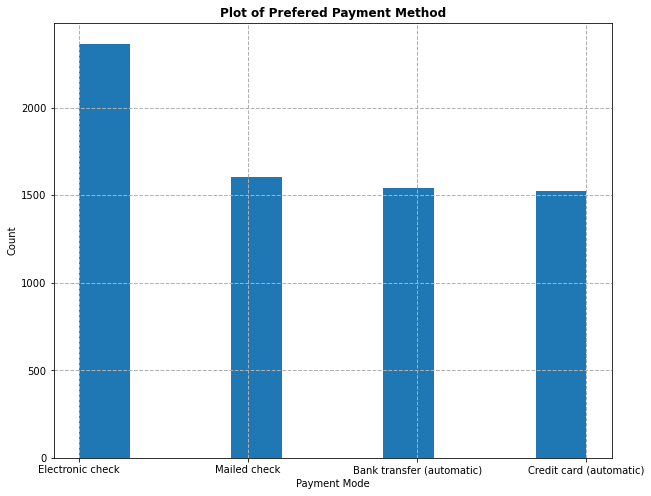

In [42]:
plt.figure(figsize=(10,8))
plt.hist(x='PaymentMethod', data = data)
plt.grid(True, linewidth= 1, linestyle="--")
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.title('Plot of Prefered Payment Method',fontweight='bold')


Comment: Among senior citizens, the most prefferd payment method: Electronic Cheque, followed by mailed cheque, bank transfer and credit card transactions.
____________________________________________________________